In [101]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [102]:
Q1 = pd.read_csv('/Users/teresalee/Desktop/RejectStats_2017Q1.csv', skiprows=1)
Q2 = pd.read_csv('/Users/teresalee/Desktop/RejectStats_2017Q2.csv', skiprows=1)
Q3 = pd.read_csv('/Users/teresalee/Desktop/RejectStats_2017Q3.csv', skiprows=1)
Q4 = pd.read_csv('/Users/teresalee/Desktop/RejectStats_2017Q4.csv', skiprows=1)

In [103]:
loan17 = Q1.append([Q2,Q3,Q4])

In [104]:
#Delete unused columns
loan17 = loan17.drop(['Risk_Score', 'Policy Code', 'Zip Code'], axis=1)

In [105]:
#Change Loan Title categories so they're standardized
loan17['Loan Title'] = loan17['Loan Title'].str.replace('Business Loan', 'Business')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('home_improvement', 'Home improvement')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('car', 'Car financing')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('credit_card', 'Credit card refinancing')

In [106]:
loan17['Loan Title'] = loan17['Loan Title'].str.replace('debt_consolidation', 'Debt consolidation')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('house', 'Home buying')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('medical', 'Medical expenses')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('moving', 'Moving and relocation')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('major_purchase', 'Major purchase')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('vacation', 'Vacation')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('renewable_energy', 'Renewable energy')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('small_business', 'Small business')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('other', 'Other')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('credit_Car financingd', 'Credit card refinancing')
loan17['Loan Title'] = loan17['Loan Title'].str.replace('Credit Car financingd refinancing', 'Credit card refinancing')

In [122]:
#Optional: Change column names with _
loan17 = loan17.rename(columns = {'Amount Requested': 'Amount_Requested', 
                          'Application Date': 'Application_Date', 
                          'Loan Title':'Loan_Title', 
                          'Debt-To-Income Ratio':'Debt_to_Income_Ratio', 
                          'Employment Length':'Employment_Length'})

In [108]:
loan17.head()

,Amount_Requested,Application_Date,Loan_Title,Debt_to_Income_Ratio,State,Employment_Length
0,20000.0,2017-01-01,Debt consolidation,0%,GA,NaN
1,15000.0,2017-01-01,Home improvement,0.58%,PA,< 1 year
2,1000.0,2017-01-01,Debt consolidation,0%,TX,< 1 year
3,2500.0,2017-01-01,Car financing,1.7%,DE,5 years
4,6000.0,2017-01-01,Credit card refinancing,2.93%,TX,5 years


In [ ]:
#Total number of rejected applications by state
State_Total_Rej = loan17.groupby('State').Application_Date.count()

In [ ]:
#Insert Chart here for State_Total_Rej
State_Total_Rej

In [ ]:
#Total in amount requested by state
# State_Loan_Amount = loan17.groupby('State').sum()
# State_Loan_Amount

In [98]:
# LT = loan17['Loan_Title'].dropna().unique()

In [38]:
LT = ["Business",                   
      "Car financing",             
      "Credit card refinancing", 
      "Debt consolidation",        
      "Green loan",                 
      "Home buying",               
      "Home improvement",            
      "Learning and training",          
      "Major purchase",             
      "Medical expenses",          
      "Moving and relocation",     
      "Other",                     
      "Renewable energy",            
      "Small business",               
      "Vacation"]          

In [39]:
#Total loan applications by type
Loan_Types = loan17.groupby('Loan_Title').Loan_Title.count()
x_axis = np.arange(len(LT))

In [19]:
Loan_Types

Loan_Title
Business                    144346
Car financing               376659
Credit card refinancing     808737
Debt consolidation         3261907
Green loan                   11579
Home buying                 131127
Home improvement            349296
Learning and training           41
Major purchase              223123
Medical expenses            198288
Moving and relocation       171604
Other                      1256956
Renewable energy              5162
Small business               47408
Vacation                     85242
Name: Loan_Title, dtype: int64

Text(0,0.5,'Number of Loan Rejected within the Category')

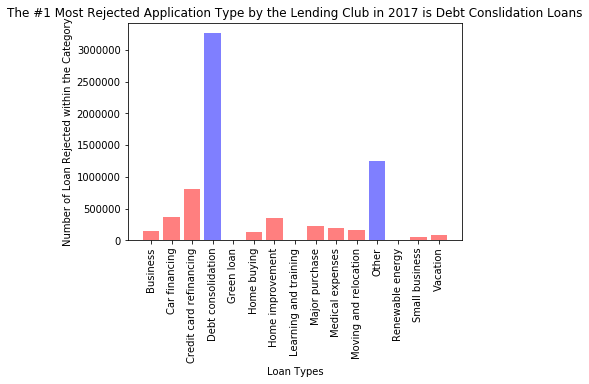

In [46]:
bar = plt.bar(x_axis, Loan_Types, color=['red', 'red', 'red','blue'], alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, LT, rotation="vertical")
plt.title("The #1 Most Rejected Application Type by the Lending Club in 2017 is Debt Conslidation Loans")
plt.xlabel("Loan Types")
plt.ylabel("Number of Loan Rejected within the Category")

In [ ]:
#Overview of loan applications by type per state
Loan_Types_Per_State = loan17.groupby('Loan_Title').State.value_counts()

In [11]:
#Overview of loan application types by state
Loan_CA = loan17[loan17.State == 'CA'].Loan_Title.value_counts()
# Loan_CA = loan17[loan17.State=="NY"].Loan_Title.value_counts()
# # Loan_Title.value_counts()
Loan_CA

Debt consolidation         381493
Other                      148492
Credit card refinancing    100151
Car financing               52531
Home improvement            29970
Major purchase              26177
Medical expenses            22172
Moving and relocation       20924
Business                    20875
Vacation                    11075
Home buying                 10143
Small business               6171
Green loan                   1218
Renewable energy              683
Learning and training           8
Name: Loan_Title, dtype: int64

In [21]:
LT2 = ["Debt consolidation", 
       "Other", 
       "Credit card refinancing", 
       "Car financing", 
       "Home improvement", 
       "Major purchase",            
       "Medical expenses",            
       "Moving and relocation",     
       "Business",                    
       "Vacation",                   
       "Home buying",               
       "Small business",               
       "Green loan",                   
       "Renewable energy",              
       "Learning and training"]

Text(0,0.5,'Number of Loan Rejected within the Category')

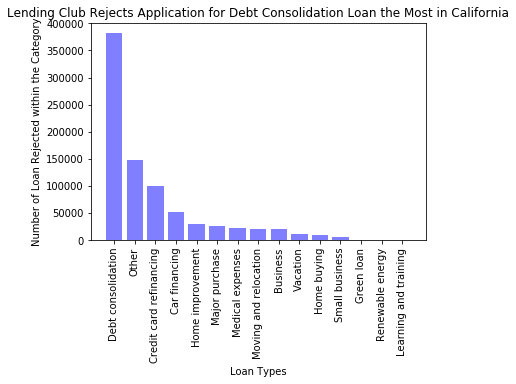

In [26]:
x = np.arange(len(LT2))
bar = plt.bar(x, Loan_CA, color=['blue'], alpha=0.5, align="center")
tick_locations = [value for value in x]
plt.xticks(tick_locations, LT2, rotation="vertical")
plt.title("Lending Club Rejects Application for Debt Consolidation Loan the Most in California")
plt.xlabel("Loan Types")
plt.ylabel("Number of Loan Rejected within the Category")

In [59]:
loan17.shape

(7072573, 6)

In [109]:
D2I = loan17['Debt_to_Income_Ratio'].str.replace('%', '')
D2I = pd.to_numeric(D2I)

In [110]:
Bins = [-10, 25, 50, 75, 100, 200, 300, 400, 500]
Group_Names = ["0 to 25%", "25 to 50%", "50 to 75%", "75 to 100%", "Over 100%", "Over 200%", "Over 300%", "Over 400%"]

In [112]:
loan17["Ratio_Summary"] = pd.cut(D2I, Bins, labels=Group_Names)
# loan17.groupby('Employment_Length').Ratio_Summary.count()
loan17

,Amount_Requested,Application_Date,Loan_Title,Debt_to_Income_Ratio,State,Employment_Length,Ratio_Summary
0,20000.0,2017-01-01,Debt consolidation,0%,GA,NaN,0 to 25%
1,15000.0,2017-01-01,Home improvement,0.58%,PA,< 1 year,0 to 25%
2,1000.0,2017-01-01,Debt consolidation,0%,TX,< 1 year,0 to 25%
3,2500.0,2017-01-01,Car financing,1.7%,DE,5 years,0 to 25%
4,6000.0,2017-01-01,Credit card refinancing,2.93%,TX,5 years,0 to 25%
5,10000.0,2017-01-01,Debt consolidation,-1%,AL,< 1 year,0 to 25%
6,15000.0,2017-01-01,Debt consolidation,1.74%,PA,< 1 year,0 to 25%
7,5000.0,2017-01-01,Debt consolidation,257.83%,IN,< 1 year,Over 200%
8,1000.0,2017-01-01,Other,44.36%,GA,5 years,25 to 50%
9,30000.0,2017-01-01,Home improvement,2.85%,SC,< 1 year,0 to 25%


In [117]:
Ratio_Summary = loan17.groupby('Ratio_Summary').Ratio_Summary.count()
#The lower the better
x2=np.arange(len(Ratio_Summary))
Ratio_Summary

Ratio_Summary
0 to 25%      4147836
25 to 50%     1878930
50 to 75%      392381
75 to 100%     465775
Over 100%       68023
Over 200%       25345
Over 300%       15947
Over 400%       10527
Name: Ratio_Summary, dtype: int64

Text(0,0.5,'Number of Loan Declined')

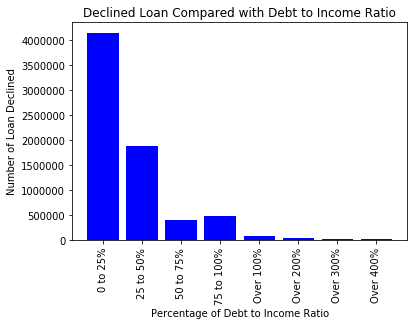

In [93]:
bar = plt.bar(x2, Ratio_Summary, color=['blue'], alpha=1, align="center")
tick_locations = [value for value in x2]
plt.xticks(tick_locations, Group_Names, rotation="vertical")
plt.title("Declined Loan Compared with Debt to Income Ratio")
plt.xlabel("Percentage of Debt to Income Ratio")
plt.ylabel("Number of Loan Declined")

In [128]:
EL = loan17.groupby('Employment_Length').Employment_Length.count()

Employment_Length
1 year         75450
10+ years      76356
2 years        47798
3 years        36469
4 years        26291
5 years       944365
6 years        12830
7 years         9643
8 years         8474
9 years         7246
< 1 year     5523122
Name: Employment_Length, dtype: int64

In [136]:
EL1 = ["1 year",
       "10+ years", 
       "2 years",        
       "3 years",        
       "4 years",       
       "5 years",       
       "6 years",        
       "7 years",         
       "8 years",         
       "9 years", 
       "< 1 year"]  

Text(0,0.5,'Number of Loan Declined')

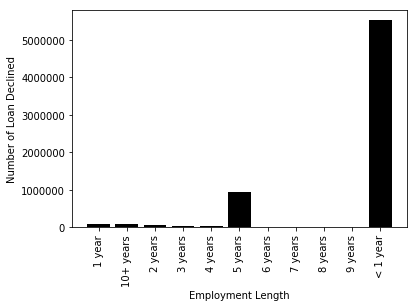

In [141]:
x3=np.arange(len(EL))
bar = plt.bar(x3, EL, color=['black'], alpha=1, align="center")
tick_locations = [value for value in x3]
plt.xticks(tick_locations, EL1, rotation="vertical")
plt.title("Employment 1 year or less has ")
plt.xlabel("Employment Length")
plt.ylabel("Number of Loan Declined")